### Stock Prize Prediction Using LSTM Model by Tithi Deb
##### Explanation:
* Begin by loading the dataset. Copy the data and paste it into an Excel file, then save it as a .csv file.
* Next, import the dataset into Python.
* Proceed to extract the closing values of the shares and assign an index to each value. Plot a graph based on this data to gain insights into the share prices over time.
* Normalize the dataset, converting the share values to a range between 0 and 1. This will be useful for training and testing the dataset.
* Train and test the data using the last 25% of the dataset, which was set aside for this purpose.
* Create a stacked LSTM model.
* Once the model is created, train it using the dataset 100 times to achieve more precise predictions and improved accuracy.
* Finally, plot a graph to visualize the data. Focus on the last 100 days of stock prices, the next 30 days of stock prices, as well as the continuous curve for the 100+30 day period.

##### IMPORTING THE LIBRARIES

In [32]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [33]:
df = pd.read_csv('Desktop\ML PROJECTS\Stock Market Prediction And Forecasting Using Stacked Lstm\Stock prize prediction.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN
...,...,...,...,...,...,...,...,...,...
2030,7/27/2010,117.60,119.50,112.00,118.80,118.65,586100,694.98,NaN
2031,7/26/2010,120.10,121.00,117.10,117.10,117.60,658440,780.01,NaN
2032,7/23/2010,121.80,121.95,120.25,120.35,120.65,281312,340.31,NaN
2033,7/22/2010,120.30,122.00,120.25,120.75,120.90,293312,355.17,NaN


In [34]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN


In [35]:
df = df.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [36]:
df.isnull().sum()

0

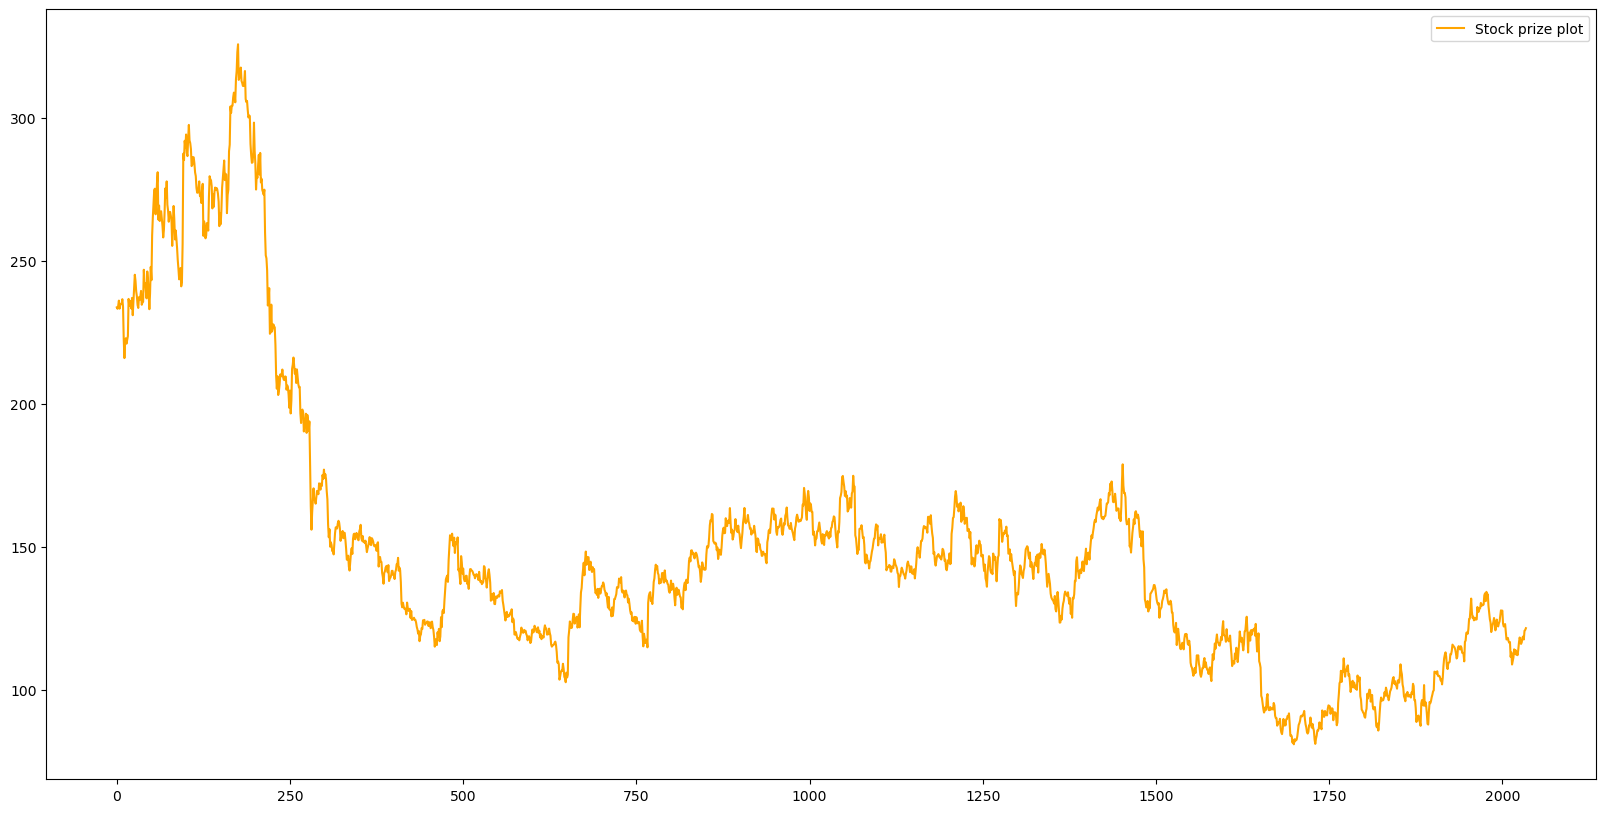

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df,color='orange',label='Stock prize plot')
plt.legend()

### Preprocessing The Dataset

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


### Train and test datasets according to the time step

In [39]:
training_size = int(len(df)*0.75)
test_size=int(len(df)) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]

In [40]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [41]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [42]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### LSTM model

In [43]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 15s 315ms/step - loss: 0.0234 - val_loss: 0.0087
Epoch 2/100
23/23 [==============================] - 6s 274ms/step - loss: 0.0029 - val_loss: 7.2935e-04
Epoch 3/100
23/23 [==============================] - 6s 276ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/100
23/23 [==============================] - 6s 275ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 6s 276ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 6s 281ms/step - loss: 0.0012 - val_loss: 9.4807e-04
Epoch 7/100
23/23 [==============================] - 6s 283ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 6s 276ms/step - loss: 0.0013 - val_loss: 8.5932e-04
Epoch 9/100
23/23 [==============================] - 6s 272ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 6s 269ms/step - loss: 0.

In [45]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [46]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculating Root Mean Square Error

In [47]:
math.sqrt(mean_squared_error(y_train,train_predict))

162.80247779935462

In [48]:
math.sqrt(mean_squared_error(y_test,test_predict))

105.62819674835455

### Plotting the Graph

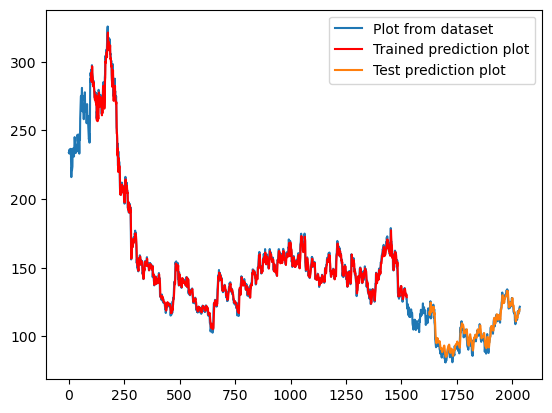

In [49]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df),label='Plot from dataset')
plt.plot(trainPredictPlot,'r',label='Trained prediction plot')

plt.plot(testPredictPlot,label='Test prediction plot')
plt.legend()
plt.show()

In [50]:
len(test_data)

509

In [51]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [53]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16569766]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df)

2035

### Graph of last 100 days

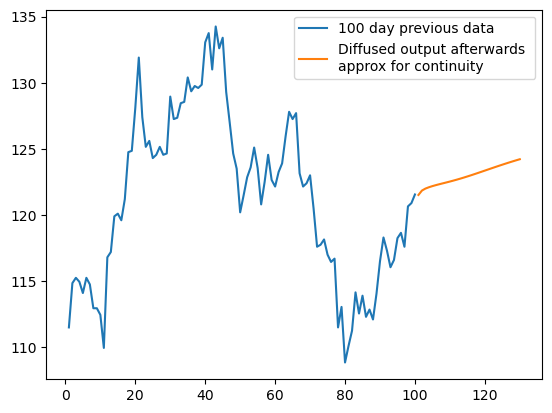

In [55]:
plt.plot(day_new,scaler.inverse_transform(df[1935:]),label='100 day previous data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Diffused output afterwards \napprox for continuity')
plt.legend()

###  Graph for next 30 days

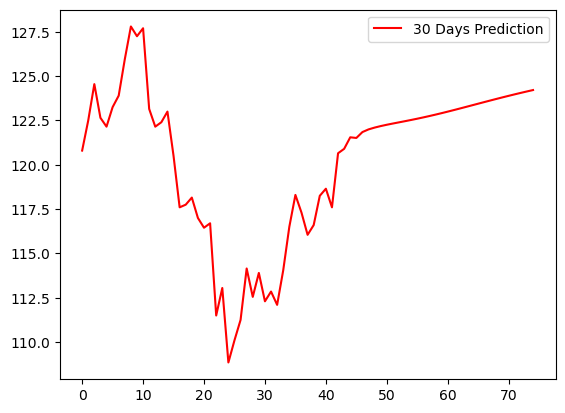

In [56]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='30 Days Prediction')
plt.legend()

### Graph for 130 Days

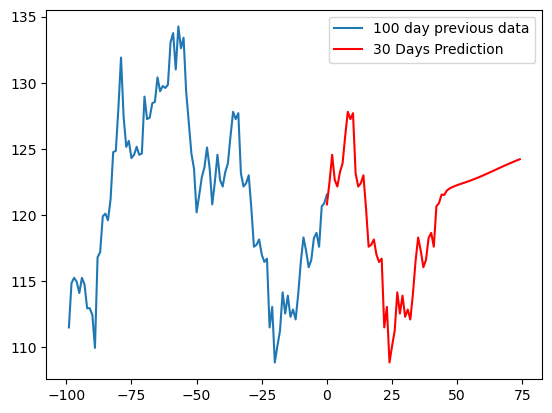

In [57]:
plt.plot(day_new-100,scaler.inverse_transform(df[1935:]),label='100 day previous data')
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='30 Days Prediction')
plt.legend()